In [1]:
import librosa

import matplotlib.pyplot as plt
import numpy as np

import os

import soundfile as sf

In [2]:
filename_u = "Signal_u.wav"
filename_r = "Signal_r.wav"

u, sr = librosa.load(os.path.join('data', filename_u))
r, sr = librosa.load(os.path.join('data', filename_r))

In [4]:
def correlate(x, y, shift):
    value = 0
    
    for k in range(len(x)):
        y_idx = k + shift
        
        x_val = x[k]
        y_val = 1
        
        if (y_idx > (len(y) - 1)):
            y_val = 0
        elif (y_idx < 0):
            y_val = 0
        else:
            y_val = y[y_idx]
        
        value += (x_val * y_val)
        
    return value / float(len(x))

In [5]:
def get_beta_opt(u, r, n):
    phi_ru_0 = np.zeros(n)
    phi_uu = np.zeros(shape=(n, n))
    
    for i in range(n):
        phi_ru_0[i] = correlate(r, u, -i)
        print("phi_ru_0 " + str(i) + " = " + str(phi_ru_0[i]))
        
    for i in range(n):
        for j in range(i, n):
            value = correlate(u, u, i)
            phi_uu[i, j] = value
            phi_uu[j, i] = value
            print("phi_uu " + str(i) + " " +str(j) + " = " + str(value))
                  
    print("matrices done")
                  
    beta_opt = np.linalg.inv(phi_uu) @ phi_ru_0
                  
    return beta_opt

In [6]:
def get_y(u, beta_opt):
    y = np.zeros(len(u))
    
    for timeframe_idx in range(len(u)):
        
        y_val_tmp = 0
        
        tmp_idx = timeframe_idx
        
        for filter_coeff_idx in range(len(beta_opt)):
            y_val_tmp += (beta_opt[filter_coeff_idx] * u[tmp_idx])
            if (tmp_idx > 0):
                tmp_idx -= 1
            else:
                break
                
        y[timeframe_idx] = y_val_tmp
        
    return y

In [7]:
a = get_beta_opt(u, r, 10)

phi_ru_0 0 = 1.081102184613238e-05
phi_ru_0 1 = 1.1403545219413971e-05
phi_ru_0 2 = 1.1977655776120325e-05
phi_ru_0 3 = 1.260351531665037e-05
phi_ru_0 4 = 1.3241546672890459e-05
phi_ru_0 5 = 1.3580491402662394e-05
phi_ru_0 6 = 1.3802153978452963e-05
phi_ru_0 7 = 1.4094584682744548e-05
phi_ru_0 8 = 1.3999351913700908e-05
phi_ru_0 9 = 1.39333349052236e-05
phi_uu 0 0 = 0.0015272963189721296
phi_uu 0 1 = 0.0015272963189721296
phi_uu 0 2 = 0.0015272963189721296
phi_uu 0 3 = 0.0015272963189721296
phi_uu 0 4 = 0.0015272963189721296
phi_uu 0 5 = 0.0015272963189721296
phi_uu 0 6 = 0.0015272963189721296
phi_uu 0 7 = 0.0015272963189721296
phi_uu 0 8 = 0.0015272963189721296
phi_uu 0 9 = 0.0015272963189721296
phi_uu 1 1 = 0.0015045822807596095
phi_uu 1 2 = 0.0015045822807596095
phi_uu 1 3 = 0.0015045822807596095
phi_uu 1 4 = 0.0015045822807596095
phi_uu 1 5 = 0.0015045822807596095
phi_uu 1 6 = 0.0015045822807596095
phi_uu 1 7 = 0.0015045822807596095
phi_uu 1 8 = 0.0015045822807596095
phi_uu 1 9 = 0

In [8]:
y_calced = get_y(u, a)

In [9]:
s = [(r[i] - y_calced[i]) for i in range(min(len(r), len(y_calced)))]

In [10]:
time = [float(timeframe) / sr for timeframe in range(len(s))]

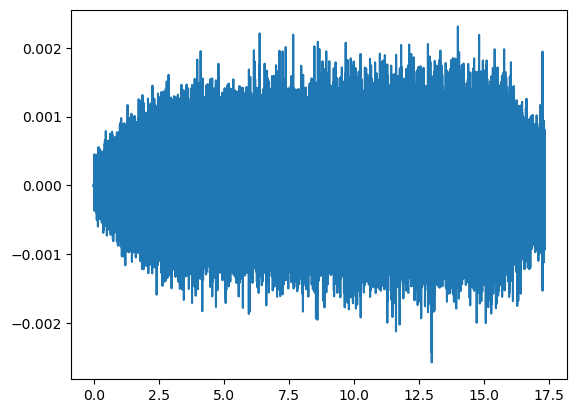

In [11]:
plt.plot(time, y_calced)

In [12]:
sf.write(os.path.join('data', 'no_wind.wav'), y_calced, sr, subtype='PCM_24')